<h1><font color=#1661AB>NeuroFlow Data Team Take-Home Project</font color=#1661AB></h1>
<p>Created by: <strong>Ziwei Jiang</strong>
<p>Language Used: <strong>Python 3</strong>
<p>Package Needed: pandas, numpy, time, datetime, matplotlib.pyplot, scipy(please install these packages before running the code below.)

<h3><font color=#1661AB>Part I: Data Analytics and Visualization</font color=#1661AB></h3>


<h4><font color=#1661AB>Data Cleansing</font color=#1661AB></h4>

Read Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("subj_measures.csv",header=0)

Reform the "date" column

In [2]:
import time
import datetime
reformed = []
for date in data["date"]:
    if isinstance(date,str):
        date = date[0:10]
        reformed.append(date)
data["date"]=pd.Series(reformed)

Extract subset for mood, stress, rumination, and sleep tracking.

In [3]:
mood = data[data["type"]=="mood"]
sleep = data[data["type"]=="sleep"]
rumination = data[data["type"]=="ruminationStress"]
stress = data[data["type"]=="anticipatoryStress"]

<h4><font color=#1661AB>Dataset description</font color=#1661AB></h4>

In [4]:
print("number of distinct users:", len(data["user_id"].unique()))
print("number of distinct days:", len(data["date"].unique()))
print("number of records for mood:", len(mood["value"]))
print("number of records for sleep:",len(sleep["value"]))
print("number of records for rumination stress:",len(rumination["value"]))
print("number of records for anticipatory stress:",len(stress["value"]))

number of distinct users: 100
number of distinct days: 326
number of records for mood: 3397
number of records for sleep: 3415
number of records for rumination stress: 316
number of records for anticipatory stress: 332


<strong>conclusions from the previous cell</strong>
<ul>
<li>The records for rumination stress and anticipatory stress is far less than records for mood and sleep.
<li>Not every user will record all the four metrics every day.
    <ul>
        <li>Some user never record their rumination stress and anticipatory stress.
        <li>Some user will record their mood and sleep for more than once in a day.
    </ul>
</ul>

<h4><font color=#1661AB>Data Explorations</font color=#1661AB></h4>
<p>First, we create buckets for each dataset. The criterion is rounding to the nearest integer.

In [5]:
def CreateBucket(column):
    result = []
    for item in column:
        if item <0.5:
            result. append(0)
        elif item >= 0.5 and item <1.5:
            result. append(1)
        elif item >= 1.5 and item <2.5:
            result. append(2)
        elif item >= 2.5 and item <3.5:
            result. append(3)
        elif item >= 3.5 and item <=4:
            result. append(4)
    return pd.Series(result)

We would like to see the proportion of all the kind of response in each <strong>Subjective Metrics</strong> questions.

In [6]:
mood_level = CreateBucket(mood["value"])
mood_counts = list(mood_level.groupby(mood_level).count())
sleep_level = CreateBucket(sleep["value"])
sleep_counts = list(sleep_level.groupby(sleep_level).count())
rumination_level = CreateBucket(rumination["value"])
rumination_counts = list(rumination_level.groupby(rumination_level).count())
stress_level = CreateBucket(stress["value"])
stress_counts = list(stress_level.groupby(stress_level).count())

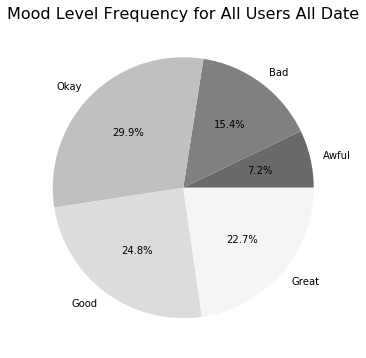

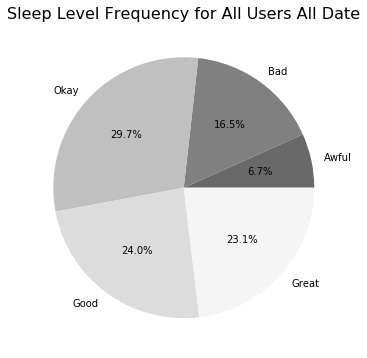

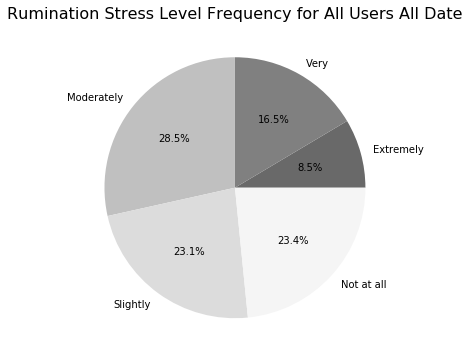

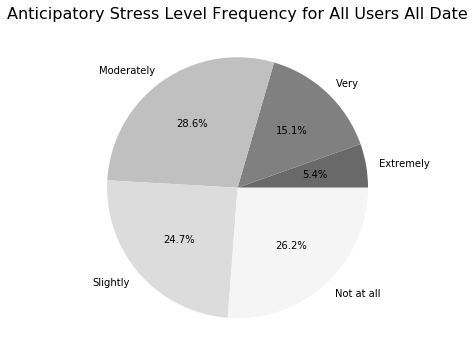

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
level = ["Awful", "Bad", "Okay", "Good", "Great"]
level_=["Not at all", "Slightly", "Moderately", "Very", "Extremely"]
level_.reverse()
colormap=["dimgrey","grey","silver","gainsboro","whitesmoke"]

plt.figure(figsize=(6,6))
plt.title("Mood Level Frequency for All Users All Date",{'fontsize': 16})
plt.pie(mood_counts, labels=level, colors=colormap,autopct='%1.1f%%')

plt.figure(figsize=(6,6))
plt.title("Sleep Level Frequency for All Users All Date",{'fontsize': 16})
plt.pie(sleep_counts, labels=level, colors=colormap,autopct='%1.1f%%')

plt.figure(figsize=(6,6))
plt.title("Rumination Stress Level Frequency for All Users All Date",{'fontsize': 16})
plt.pie(rumination_counts, labels=level_, colors=colormap,autopct='%1.1f%%')

plt.figure(figsize=(6,6))
plt.title("Anticipatory Stress Level Frequency for All Users All Date",{'fontsize': 16})
plt.pie(stress_counts, labels=level_, colors=colormap,autopct='%1.1f%%')

plt.show()

<strong>conclusions from the previous cell</strong>
<ul>
<li>The proportion of each level for each metrics generally looks similar to each other.
</ul>

Next, we are going to find how will each <strong>Subjective Metrics</strong> changes for a specific user.

In [8]:
def UserSubsetQuery(user_id,dataset):
    try:
        user_subset = dataset[dataset["user_id"]==user_id]
        user_data = pd.DataFrame([user_subset["date"],user_subset["value"]]).T
    except:
        print("We are missing subjective metrics data for this user.")
    return user_data

def UserQuery(user_id):
    user_mood = UserSubsetQuery(user_id,mood).set_index("date")
    user_mood.columns = ["mood"]
    user_sleep = UserSubsetQuery(user_id,sleep).set_index("date")
    user_sleep.columns = ["sleep"]
    user_rumination = UserSubsetQuery(user_id,rumination).set_index("date")
    user_rumination.columns = ["rumination"]
    user_stress = UserSubsetQuery(user_id,stress).set_index("date")
    user_stress.columns = ["stress"]
    if len(user_mood.join([user_sleep,user_rumination,user_stress],how='outer')) == 0:
        print("We are missing subjective metrics data for this user.")
    return user_mood.join([user_sleep,user_rumination,user_stress],how='outer')
    

You can simply change user_id in the following cell:

In [9]:
user_id = mood["user_id"].unique()[10]
#user_id = 10
UserQuery(user_id)

,mood,sleep,rumination,stress
date,,,,
2018-08-23,4,NaN,NaN,NaN
2018-08-29,3.2,NaN,NaN,NaN
2018-09-08,NaN,3.92,NaN,2.25619
2018-09-14,2.72,NaN,NaN,NaN
2018-09-15,0.76,NaN,NaN,NaN
2018-09-19,0,1.44,NaN,NaN
2018-09-21,NaN,2,NaN,NaN
2018-09-24,3.45091,3.96,NaN,NaN
2018-09-24,3.45091,2.92,NaN,NaN


Plot these metrics' changes.

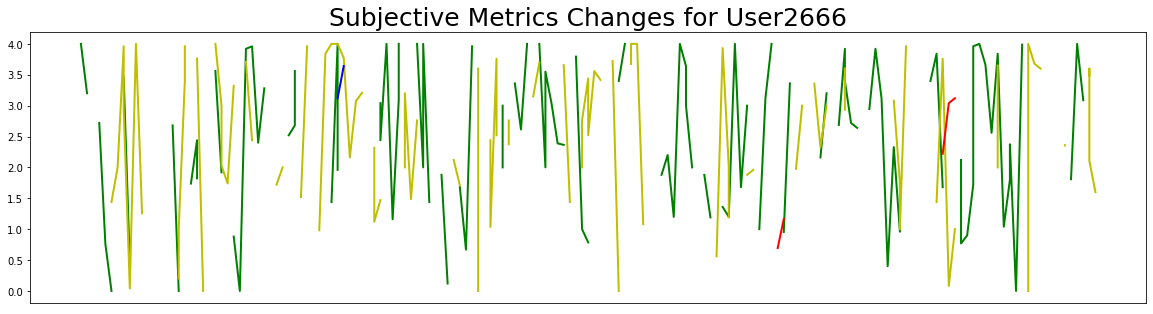

In [10]:
x = UserQuery(user_id).index
y1 = UserQuery(user_id)["mood"]
y2 = UserQuery(user_id)["sleep"]
y3 = UserQuery(user_id)["rumination"]
y4 = UserQuery(user_id)["stress"]

plt.figure(figsize=(20,5))
plt.title(f"Subjective Metrics Changes for User%s"%user_id,{'fontsize': 25})
plt.plot(x,y1,'g',x,y2,'y',x,y3,'r',x,y4,'b',linewidth=2)
plt.xticks([])

plt.show()

Let's discover a little bit more about the patients. For example, for each patient, we can calculate the average score of each metrics.

In [11]:
avg_mood=[]
avg_sleep=[]
avg_rumination=[]
avg_stress=[]
for user_id in list(data["user_id"].unique()):
    user_avg_data = UserQuery(user_id).mean()
    avg_mood.append(user_avg_data["mood"])
    avg_sleep.append(user_avg_data["sleep"])
    avg_rumination.append(user_avg_data["rumination"])
    avg_stress.append(user_avg_data["stress"])
user_avg_info = pd.DataFrame([data["user_id"].unique(),avg_mood,avg_sleep,avg_rumination,avg_stress]).T
user_avg_info.columns = ["user_id","avg_mood","avg_sleep","avg_rumination","avg_stress"]
user_avg_info = user_avg_info.set_index("user_id")
user_avg_info = user_avg_info.dropna()

In [12]:
import scipy
from scipy import optimize

def MSE(b):
    x1 = np.array(user_avg_info["avg_sleep"])
    x2 = np.array(user_avg_info["avg_rumination"])
    x3 = np.array(user_avg_info["avg_stress"])
    y =  np.array(user_avg_info["avg_mood"])
    pred =b[0] + b[1]*x1 + b[2]*x2 + b[3]*x3
    mse = sum(list(map(lambda x: x**2, y - pred)))
    return mse

result = scipy.optimize.minimize(MSE, [1,1,1,1])
print("The relationship between average mood and sleep, rumination/anticipatory stress scores is: ")
print("mood = % 5.2f + % 5.2f * sleep + % 5.2f * rumination stress+ % 5.2f  * anticipatory stress" % tuple(result.x))

The relationship between average mood and sleep, rumination/anticipatory stress scores is: 
mood =  1.75 +  0.18 * sleep +  0.03 * rumination stress+  0.07  * anticipatory stress


<h4><font color=#1661AB>Conclusion and Improvement</font color=#1661AB></h4>

<p>As we can see from the the result of one of our user (<strong>user_id=2666</strong>) , their rating for mood (<font color=#1B813E>green lines</font color=#1B813E>) and sleep quality (<font color=#DDD23B>yellow lines</font color=#DDD23B>) tend to move in the same direction, and their rating for rumination stress (<font color=#CB1B45>red lines</font color=#CB1B45>) and anticipatory stress(<font color=#113285>blue lines</font color=#113285>) seems not so related to the previous two metrics. 
<p>Intuitively, we would say that this user's moods are affected by his/her sleeping quality, rumination stress level and anticipatory stress level. 
<ul>
    <li><strong>Sleeping quality:</strong> positively related to their mood, sometimes will affect their mood in the future.</li>
    <li><strong>Rumination stress:</strong> slightly positively related to their mood.</li>
    <li><strong>Anticipatory stress:</strong> slightly positively related to their mood.</li>
</ul>
<p>Idealy, if we can collect all the four metrics user data within the same day, and keep tracking for more consecutive days, we can do regression on mood and other metrics. 

<p><strong>What are 2-3 additional pieces of information that would be important to collect?</strong>
<ol>
<li>As mentioned above, collect all the four metrics user data within the same day, and keep tracking for more consecutive days. Thus, we can do regression on each user to explore more on the relationship between the four metrics of that specified user.
<li>If we want to see whether the therapy is making a difference, the date of each user receiving his/her therapy should be included. Thus, we can split user data by 'before therapy', 'after therapy' to prepare for an A/B testing.
<li>If possible, we can also collect data of which mental health provider does each user go to. Thus, we can do a recommendation on mental health provider choice to the patients.
</ol>

<h3><font color=#1661AB>Part II: SQL</font color=#1661AB></h3>

For this part, I arranged my answers to each question in a long string, please do the necessary connection to your database.

<h4><font color=#1661AB>1. How many users completed an exercise in their first month per monthly cohort?</font color=#1661AB></h4>
<p>Assume you have two tables in our company’s database:
<ul>
<li>'users' table, with columns 
    <ul>
    <li>'user_id'
    <li>'created_at'
    </ul>
<li>‘exercises’ table, with columns 
    <ul>
    <li>'exercise_id'
    <li>'user_id'
    <li>'exercise_completion_date'
    </ul>
</ul>
<p> 
<p>Write a single SQL query that breaks up the users based on the month that they signed up (their cohort month), and determines the percentage of users that have a completed exercise in their
first month for each monthly cohort.
<p>(e.g., the 2018 January cohort has x% of users completing an exercise in their first month, 2018 February cohort has x% of users completing an exercise in their first month, etc.)


In [ ]:
"""
select
    concat(
        (
            sum
                (case
                    when (date_add(u.created_at, interval 30 day) >= e.exercise_completion_date) then 1 else 0
                end) 
            / count(u.user_id)) * 100
    ,"%")
as  "first month exercise percentage"
from
    users u left join exercises e 
        on u.user_id = e.user_id
    group by month(u.created_at)
    order by month(u.created_at) asc
;
"""


<h4><font color=#1661AB>2. Which organizations have the most severe patient population?</font color=#1661AB></h4>
<p>Assume you have two tables in our company’s database:
<ul>
<li>‘Providers’ table that contains
    <ul>
    <li>‘provider_id’
    <li>‘organization_id’
    <li>‘organization_name’
    </ul>
<li> ‘Phq9’ table that contains
    <ul>
    <li>‘patient_id’
    <li>’provider_id’
    <li>‘score’,’datetime_created’
    </ul>
</ul>
<p> 
<p>For context, A phq score ranges from 0-27 and anything 20 or above is considered severe. 
<p>Write a single query that finds the top five organizations that have the highest average phq9 score per patient.


In [ ]:
"""
select 
    v.provider_id, v.organization_name, avg(p.score) as "avg_phq9_score"
from
    Providers v left join Phq9 p on v.provider_id = p.provider_id
    group by p.provider_id
    order by avg_phq9_score desc
    limit 5
;
"""